In [1]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [8]:
df = pd.read_csv("Downloads/train.csv")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.shape

(891, 12)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df.types()

AttributeError: 'DataFrame' object has no attribute 'types'

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [28]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [30]:
df["Embarked"].fillna(df["Embarked"].mode(),inplace=True)

In [32]:
df.shape

(891, 8)

In [34]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [36]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(775, 8)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


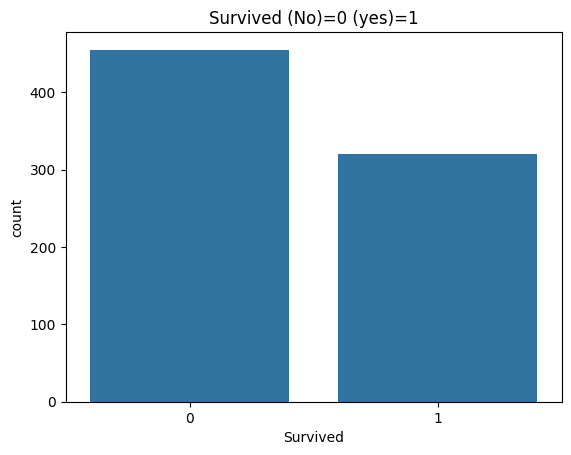

In [50]:
sns.countplot(x='Survived',data=df)
plt.title("Survived (No)=0 (yes)=1")
plt.show()

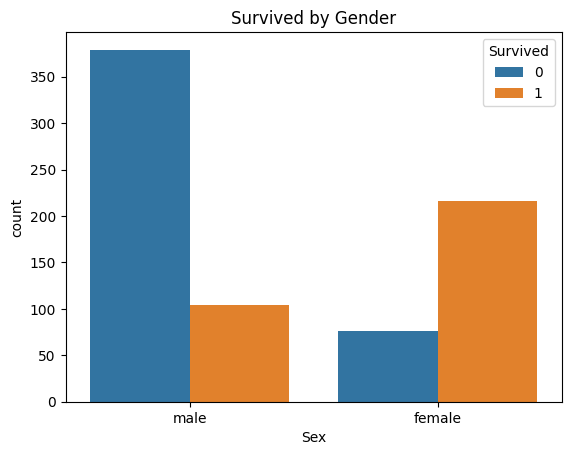

In [52]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survived by Gender")
plt.show()

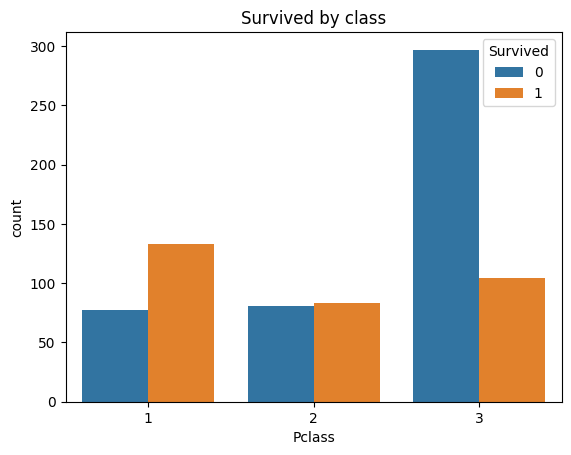

In [54]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survived by class")
plt.show()

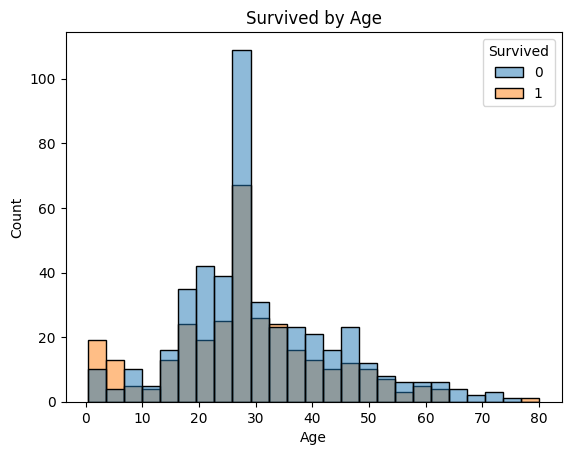

In [60]:
sns.histplot(data=df, x='Age' , hue = 'Survived')
plt.title("Survived by Age")
plt.show()

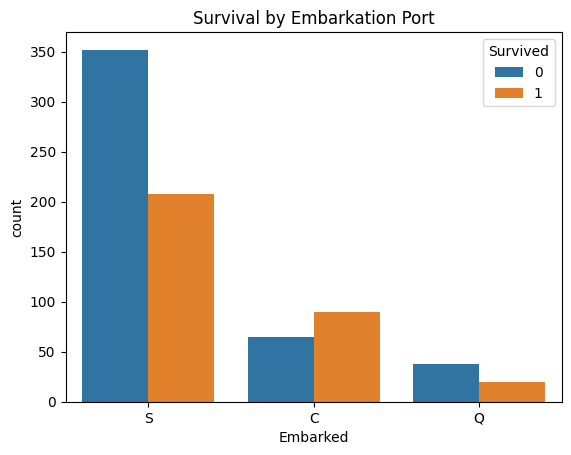

In [62]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Port")
plt.show()

#More females survived than males
#Class 1 people had higher rates of survival
#More people embared on s port and have higher survival

In [64]:
df["Sex"]=df["Sex"].map({'male':0 , 'female':1})


In [66]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [68]:
df=pd.get_dummies(df,columns=['Pclass'],drop_first=True)

In [70]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False
2,1,1,26.0,0,0,7.9250,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,True,False,False
4,0,0,35.0,0,0,8.0500,False,True,False,True


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
X = df.drop("Survived", axis=1)
y= df["Survived"]

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [82]:
y_pred=model.predict(X_test)

In [86]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy : {accuracy:.2f}")

Model Accuracy : 0.78


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [90]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
tree_acc=accuracy_score(y_test,tree.predict(X_test))

In [94]:
rbf=RandomForestClassifier()
rbf.fit(X_train,y_train)
rbf_acc=accuracy_score(y_test,rbf.predict(X_test))

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_acc = accuracy_score(y_test,knn.predict(X_test))

In [100]:
print(f" Logistic Model Accuracy : {accuracy:.2f}")
print(f" Decision tree Model Accuracy : {tree_acc:.2f}")
print(f" Random forest Model Accuracy : {rbf_acc:.2f}")
print(f" KNeighbors Model Accuracy : {knn_acc:.2f}")


 Logistic Model Accuracy : 0.78
 Decision tree Model Accuracy : 0.74
 Random forest Model Accuracy : 0.76
 KNeighbors Model Accuracy : 0.69
